In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# import library
import pickle

# open the file of interest, and use pickle loading
higg_file = open ("higgs_100000_pt_250_500.pkl",'rb')
higg_dict = pickle.load(higg_file)

# list all keys of the files
higg_dict.keys()
#data = np.array(new_dict.get('pt'))

qcd_file = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd_dict = pickle.load(qcd_file)

qcd_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

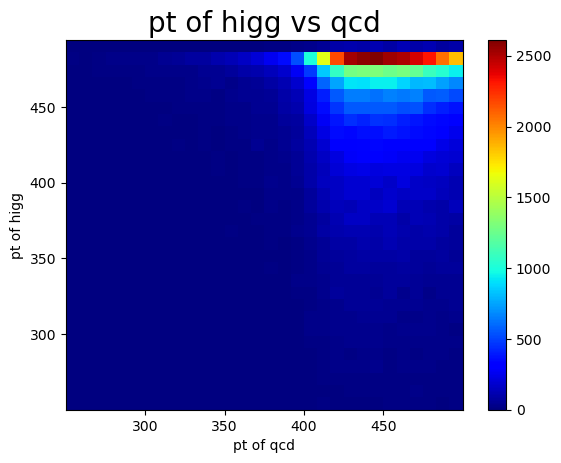

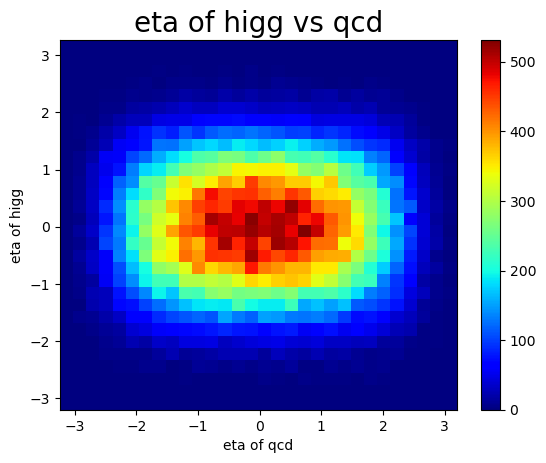

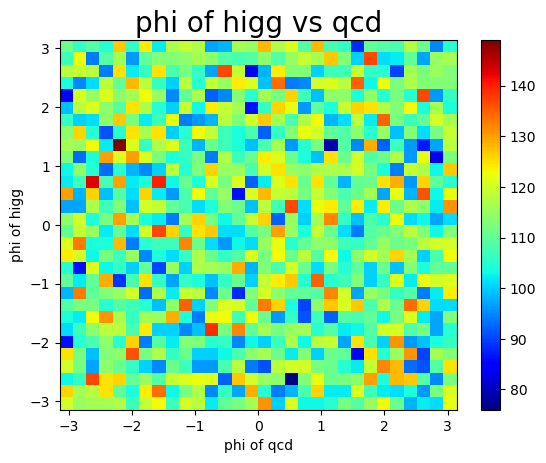

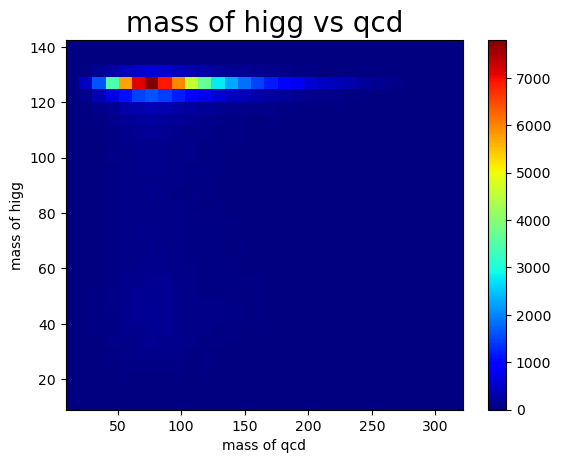

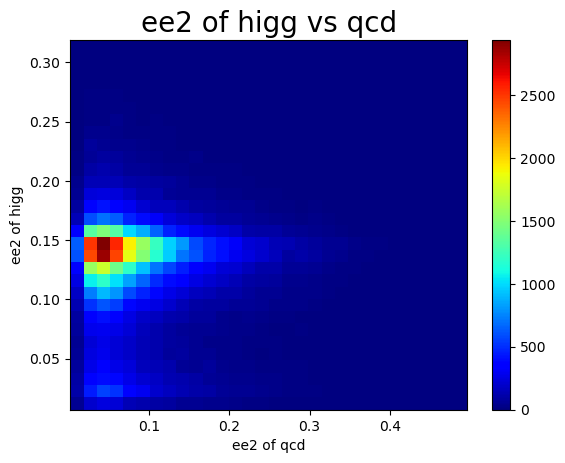

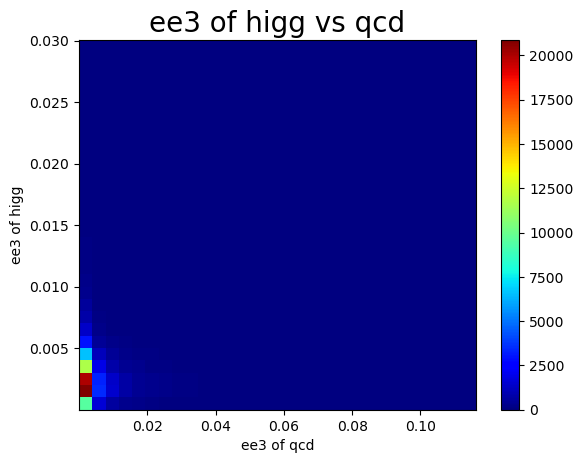

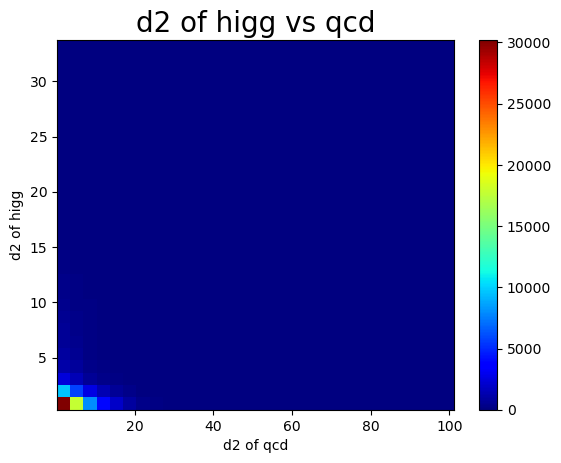

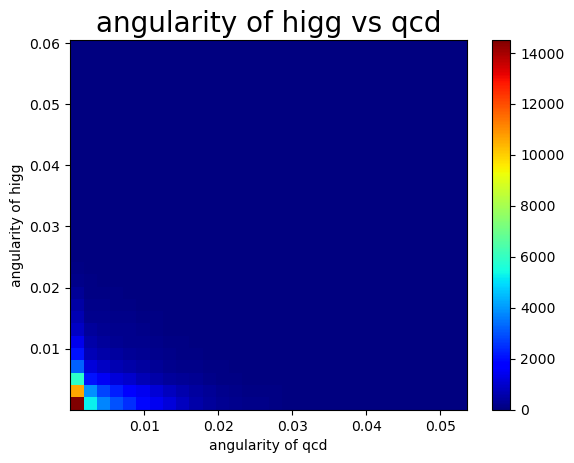

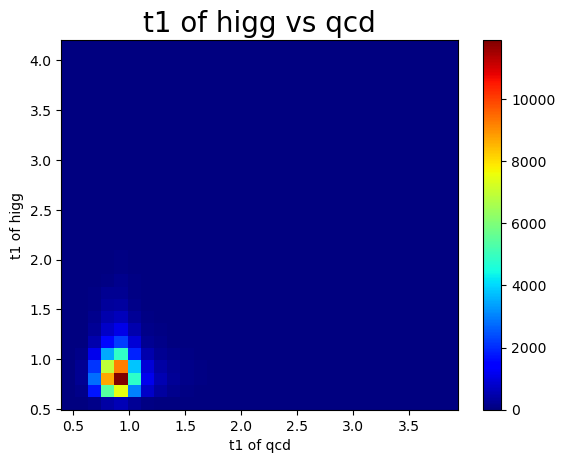

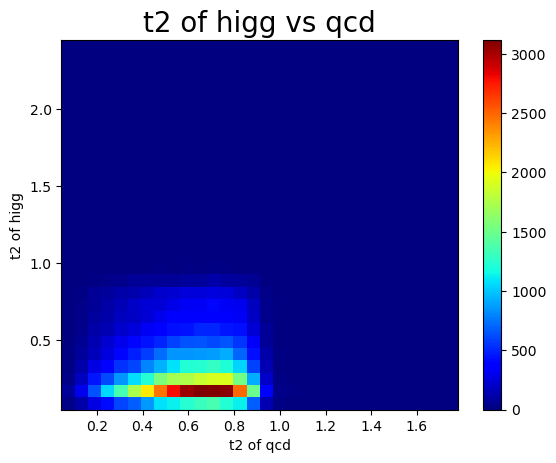

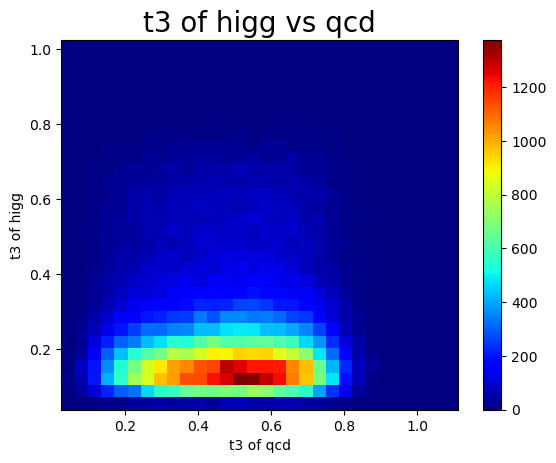

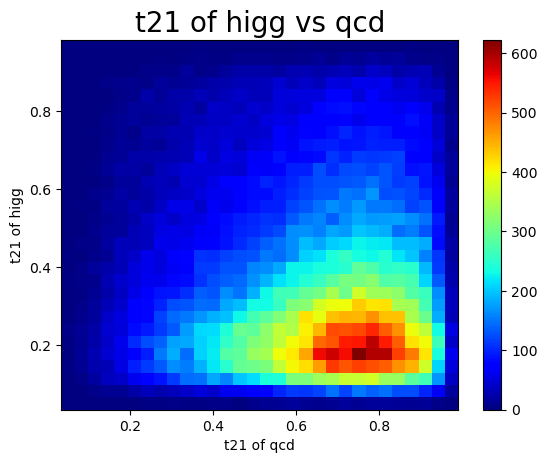

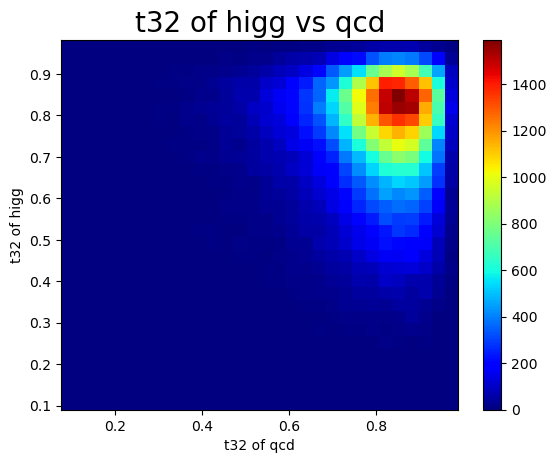

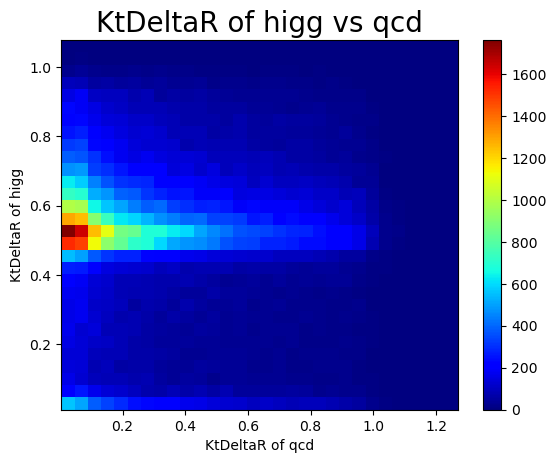

In [3]:
for x in qcd_dict:
    plt.figure()
    #plt.plot(qcd_dict[x], higg_dict[x], 'o')
    plt.hist2d(qcd_dict[x], higg_dict[x], bins=(30, 30), cmap=plt.cm.jet)
    plt.colorbar()


    plt.title(x + " of higg vs qcd", fontsize = 20) 
    plt.xlabel(x + " of qcd")
    plt.ylabel(x + " of higg")

1) According to the plots above, we can see that not all of the features provide discrimination power between signal and background. Based on the observation of the data range and density, for example, the phi variable, the range and density of the data are pretty much alike for signal and background, which each of them is just not powerful enough to discriminate higg signal from qcd background. 

In [53]:
display(pd.DataFrame(qcd_dict).corr())
display(pd.DataFrame(higg_dict).corr())
diff = qcd_dict - higg_dict
display(pd.DataFrame(diff).corr())
display(pd.DataFrame(higg_dict).corrwith(qcd_dict))

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.001646,-0.002151,0.116106,-0.065045,-0.071166,0.044540,-0.006096,-0.015842,-0.015435,-0.012933,-0.010350,0.002034,-0.020723
eta,0.001646,1.000000,0.001982,0.000331,-0.000829,0.000016,0.003129,0.001901,0.001541,0.003722,0.001989,0.002678,-0.002362,0.002631
phi,-0.002151,0.001982,1.000000,0.001781,-0.000084,-0.001442,0.000616,0.002013,0.000068,0.003766,0.004418,0.003519,0.002664,-0.003412
mass,0.116106,0.000331,0.001781,1.000000,0.944705,0.823995,-0.609440,0.395267,0.047805,-0.518935,-0.597166,-0.571218,-0.369384,0.709354
ee2,-0.065045,-0.000829,-0.000084,0.944705,1.000000,0.888003,-0.660044,0.335057,0.161316,-0.519772,-0.613476,-0.621209,-0.412979,0.661513
ee3,-0.071166,0.000016,-0.001442,0.823995,0.888003,1.000000,-0.413854,0.346522,0.163273,-0.304939,-0.408181,-0.388633,-0.400095,0.533815
d2,0.044540,0.003129,0.000616,-0.609440,-0.660044,-0.413854,1.000000,-0.174517,-0.110423,0.505221,0.553272,0.600450,0.239771,-0.466225
angularity,-0.006096,0.001901,0.002013,0.395267,0.335057,0.346522,-0.174517,1.000000,0.013484,-0.069498,-0.099513,-0.090325,-0.109640,0.263082
t1,-0.015842,0.001541,0.000068,0.047805,0.161316,0.163273,-0.110423,0.013484,1.000000,0.285307,0.206263,-0.087536,-0.151472,-0.209706
t2,-0.015435,0.003722,0.003766,-0.518935,-0.519772,-0.304939,0.505221,-0.069498,0.285307,1.000000,0.934555,0.913813,0.057613,-0.675798


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,-0.002129,0.001585,0.175370,-0.254340,-0.463733,-0.052192,-0.087057,-0.035002,-0.077958,-0.088589,-0.067704,-0.007152,-0.128198
eta,-0.002129,1.000000,-0.000406,0.000956,0.002153,0.004534,-0.000151,0.004274,0.002319,0.001370,0.001221,0.000088,-0.000048,-0.000458
phi,0.001585,-0.000406,1.000000,-0.002895,-0.005504,-0.004968,0.003222,0.001009,-0.004121,-0.001214,0.001452,0.000322,0.003567,0.000358
mass,0.175370,0.000956,-0.002895,1.000000,0.813764,0.445566,-0.836983,0.037857,-0.019461,-0.698137,-0.811544,-0.710751,-0.135391,0.654055
ee2,-0.254340,0.002153,-0.005504,0.813764,1.000000,0.737763,-0.772951,-0.131983,0.230258,-0.537445,-0.665586,-0.639195,-0.213722,0.468551
ee3,-0.463733,0.004534,-0.004968,0.445566,0.737763,1.000000,-0.366714,0.062178,0.199961,0.006620,-0.153715,-0.068111,-0.393777,0.263007
d2,-0.052192,-0.000151,0.003222,-0.836983,-0.772951,-0.366714,1.000000,0.081458,-0.033893,0.692267,0.782655,0.728085,0.075884,-0.554474
angularity,-0.087057,0.004274,0.001009,0.037857,-0.131983,0.062178,0.081458,1.000000,-0.244415,0.058273,0.055166,0.152686,-0.000888,0.266979
t1,-0.035002,0.002319,-0.004121,-0.019461,0.230258,0.199961,-0.033893,-0.244415,1.000000,0.190188,0.106375,-0.094686,-0.223568,-0.301780
t2,-0.077958,0.001370,-0.001214,-0.698137,-0.537445,0.006620,0.692267,0.058273,0.190188,1.000000,0.927438,0.943797,-0.330452,-0.661620


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.001552,-0.000078,0.126099,-0.151247,-0.162927,0.007464,-0.045696,-0.029307,-0.046032,-0.045675,-0.037833,-0.001104,-0.074348
eta,0.001552,1.000000,0.001620,-0.002634,-0.004045,-0.002067,0.005099,0.001020,0.001644,0.004187,0.003459,0.003192,0.000191,-0.000297
phi,-0.000078,0.001620,1.000000,-0.002329,-0.004457,-0.004071,0.002974,-0.001396,-0.002540,0.005817,0.006927,0.006135,0.001353,-0.005375
mass,0.126099,-0.002634,-0.002329,1.000000,0.905821,0.745113,-0.665871,0.280560,0.014794,-0.563487,-0.655859,-0.598275,-0.251750,0.685473
ee2,-0.151247,-0.004045,-0.004457,0.905821,1.000000,0.830639,-0.690324,0.174568,0.181009,-0.513468,-0.625949,-0.611869,-0.307259,0.592193
ee3,-0.162927,-0.002067,-0.004071,0.745113,0.830639,1.000000,-0.396062,0.271475,0.141048,-0.200672,-0.326352,-0.270510,-0.333382,0.448625
d2,0.007464,0.005099,0.002974,-0.665871,-0.690324,-0.396062,1.000000,-0.089239,-0.069196,0.552432,0.617597,0.622654,0.161274,-0.486065
angularity,-0.045696,0.001020,-0.001396,0.280560,0.174568,0.271475,-0.089239,1.000000,-0.117571,-0.011873,-0.036394,0.019687,-0.052535,0.261987
t1,-0.029307,0.001644,-0.002540,0.014794,0.181009,0.141048,-0.069196,-0.117571,1.000000,0.230554,0.151260,-0.088014,-0.196066,-0.250101
t2,-0.046032,0.004187,0.005817,-0.563487,-0.513468,-0.200672,0.552432,-0.011873,0.230554,1.000000,0.927164,0.928504,-0.156737,-0.664171


pt            0.003602
eta          -0.001862
phi           0.002839
mass          0.007142
ee2           0.003332
ee3          -0.003127
d2            0.001236
angularity   -0.002217
t1           -0.005631
t2            0.003725
t3            0.004957
t21           0.006620
t32           0.000451
KtDeltaR     -0.000708
dtype: float64

2. The data frame of qcd and higg shows there are indeed some correlations among these features. From the below examples, we can see a clear relationship of t21 with other features such as t2 and t3 

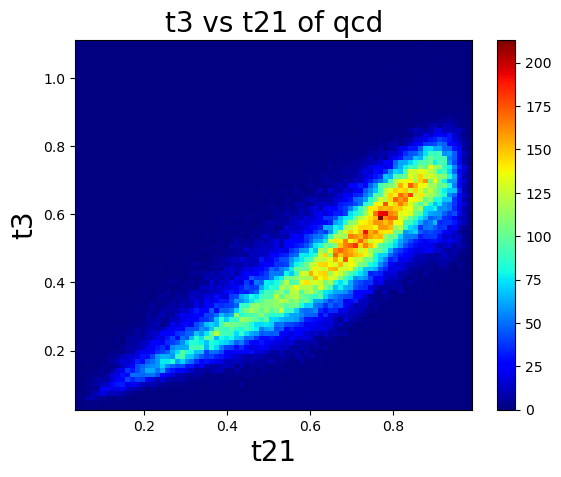

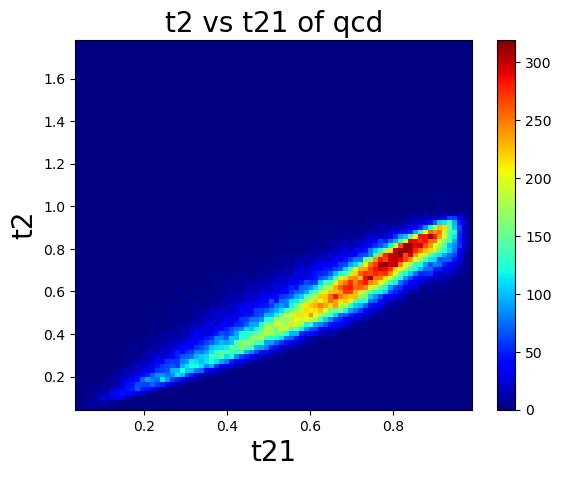

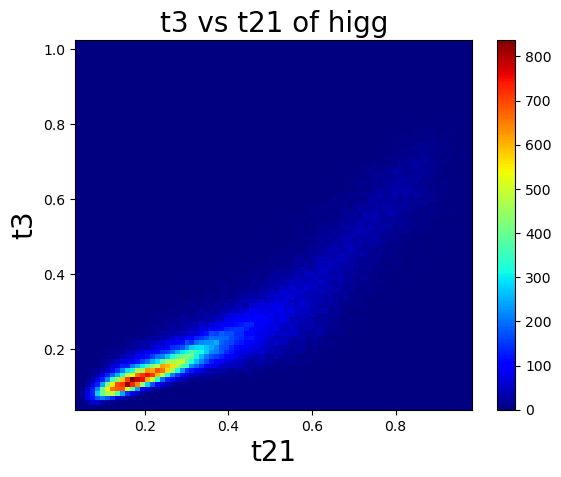

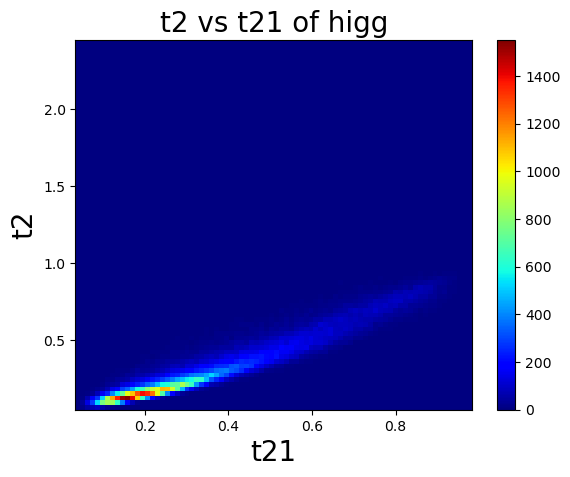

In [46]:
plt.hist2d(qcd_dict['t21'], qcd_dict['t3'], bins=(80, 80), cmap=plt.cm.jet)
plt.title('t3 vs t21 of qcd', fontsize = 20) 
plt.xlabel('t21', fontsize = 20)
plt.ylabel('t3', fontsize = 20)
plt.colorbar()
plt.show()
plt.hist2d(qcd_dict['t21'], qcd_dict['t2'], bins=(80, 80), cmap=plt.cm.jet)
plt.title('t2 vs t21 of qcd', fontsize = 20) 
plt.xlabel('t21', fontsize = 20)
plt.ylabel('t2', fontsize = 20)
plt.colorbar()
plt.show()
plt.hist2d(higg_dict['t21'], higg_dict['t3'], bins=(80, 80), cmap=plt.cm.jet)
plt.title('t3 vs t21 of higg', fontsize = 20) 
plt.xlabel('t21', fontsize = 20)
plt.ylabel('t3', fontsize = 20)
plt.colorbar()
plt.show()
plt.hist2d(higg_dict['t21'], higg_dict['t2'], bins=(80, 80), cmap=plt.cm.jet)
plt.title('t2 vs t21 of higg', fontsize = 20) 
plt.xlabel('t21', fontsize = 20)
plt.ylabel('t2', fontsize = 20)
plt.colorbar()
plt.show()

In [6]:
result = stats.norm.ppf(1-0.0001)
print(result)
result = stats.norm.ppf(1-0.2)
print(result)

3.719016485455709
0.8416212335729143


3) 
The expected yields of number of higgs is 100 for 100k samples, so the expected discovery sensitivity of higg is 3.7 sigma.
The expected yields of number of qcd is 20000 for 100k samples, so the expected discovery sensitivity of qcd is 0.84 sigma.

4. To optimize the discovery sensitivity of the signal that we are looking for, we need to find cuts that reduce the intrinsic backgrounds while preserving most of the signal (maximize SNR) in this high-dimensional data. What this is being said is basically to reduce as many qcd backgrounds and preserve as many higg signals as possible. In order to do this, we have to first take a look at the parts where the readings have little or nothing to do with the higg signal, meaning the parts that are similar in both qcd background and higg signal. What we can do is then cut out the parts which are similar and look for the difference. However, the data is in multi-dimension which we might need to consider the correlation of features and perform a multi-dimension cut that best optimizes the sensitivity of the higg signal. For example, if we find a correlation between t21 and t3 appears to be strong, we can perform a diagonal cut to reduce the noise and preserve as much good signals data as possible for multi-feature. In short, we will be focusing on the difference of the background and signal to increase the sensitivity of the higg signal.